In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [15]:
# load the dataset

df=pd.read_csv("/content/sample_data/diabetes_prediction_dataset.csv")

In [16]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
df.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [19]:
# handling missing value
# Creating dummy variables for categorical feature


In [20]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [ ]:
# Data splitting into feature (x) and variable(y)


In [21]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [22]:
#Divide the dataset into training and testing set

x_train, x_test ,y_train, y_test =train_test_split(x,y,test_size=0.2,random_state =42)

In [24]:
# Feature scaling

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#Construct the ANN model using Keras


In [26]:
model= Sequential()
model.add(Dense(64, input_dim=x_train_scaled.shape[1],activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [27]:
#Model comilation and Training
# compile the model with appropriate loss and optimixzation funstions

model.compile( loss="binary_crossentrophy", optimizer="adam", metrics =["accuracy"])

In [33]:
from keras.models import Sequential
from keras.layers import Dense

# Construct an ANN model using Keras
model = Sequential()
model.add(Dense(64, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model Compilation and Training

# Compile the model with the correct loss function and optimization algorithm
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data, validating on the test set
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(x_test_scaled, y_test))


Epoch 1/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.1231 - accuracy: 0.9573 - val_loss: 0.1126 - val_accuracy: 0.9621
Epoch 2/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.1085 - accuracy: 0.9632 - val_loss: 0.1033 - val_accuracy: 0.9653
Epoch 3/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0955 - accuracy: 0.9675 - val_loss: 0.0913 - val_accuracy: 0.9691
Epoch 4/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0877 - accuracy: 0.9698 - val_loss: 0.0862 - val_accuracy: 0.9703
Epoch 5/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0851 - accuracy: 0.9705 - val_loss: 0.0852 - val_accuracy: 0.9708
Epoch 6/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0841 - accuracy: 0.9710 - val_loss: 0.0848 - val_accuracy: 0.9709
Epoch 7/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0833 - accuracy: 0.9713 - val_loss: 0.0838 - val_accuracy:

In [35]:
# Evaluate the trained model on the test set
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


625/625 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9715
Test Loss: 0.0826, Test Accuracy: 0.9715


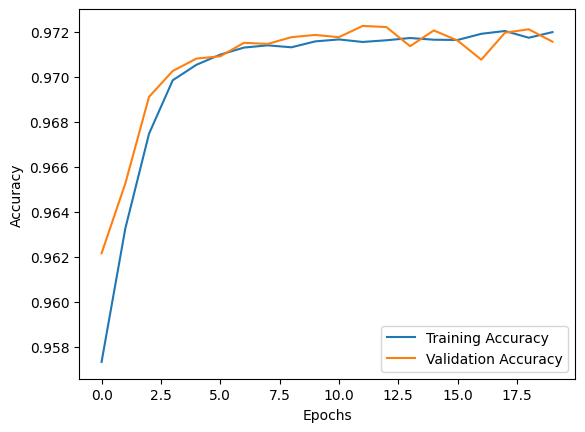

In [36]:
# Visualize the training history using plots for training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

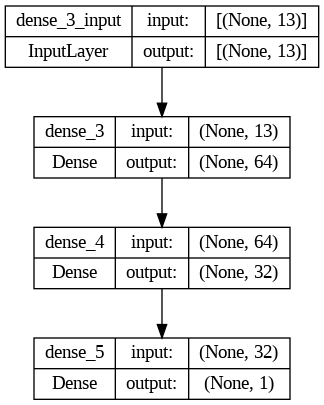

In [37]:
# Generate a visualization of the neural network architecture and save it as an image file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)